In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, recall_score, precision_score
import os, sys
import random as rd
sys.dont_write_bytecode = True
os.chdir("..")
from sklearn.model_selection import learning_curve
from utils import mnist_reader

In [5]:
seed = 1234
np.random.seed(seed)  
import matplotlib.ticker

def scale_data(X_tr: np.array, X_te: np.array) -> tuple[np.array, np.array]:
    scaler_tr = StandardScaler()
    
    scaler_tr.fit(X_tr)

    X_tr_scaled = scaler_tr.transform(X_tr)
    X_te_scaled= scaler_tr.transform(X_te)
    return X_tr_scaled, X_te_scaled

"""Load and Scale the Data"""
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
X_tr_scaled, X_te_scaled = scale_data(X_train, X_test)

In [16]:
model = MLPClassifier(hidden_layer_sizes=(200, 100), activation='relu', solver='sgd', alpha=0.0001, batch_size=256, learning_rate='constant', learning_rate_init=0.01, max_iter=500, shuffle=True, random_state=seed, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=100, max_fun=15000)

In [17]:
model.fit(X_tr_scaled, y_train)

MLPClassifier(batch_size=256, early_stopping=True,
              hidden_layer_sizes=(200, 100), learning_rate_init=0.01,
              max_iter=500, n_iter_no_change=100, random_state=1234,
              solver='sgd')

In [8]:
#function to plot confusion matrix
def plot_confusion_matrix(y_pred: np.array, y_true: np.array) -> None:
    cm = confusion_matrix(y_true, y_pred)
    class_names = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal",
                                                        "Shirt", "Sneaker", "Bag", "Ankle boot"]
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=class_names)
    disp.plot(xticks_rotation=45); 
    
    plt.show()

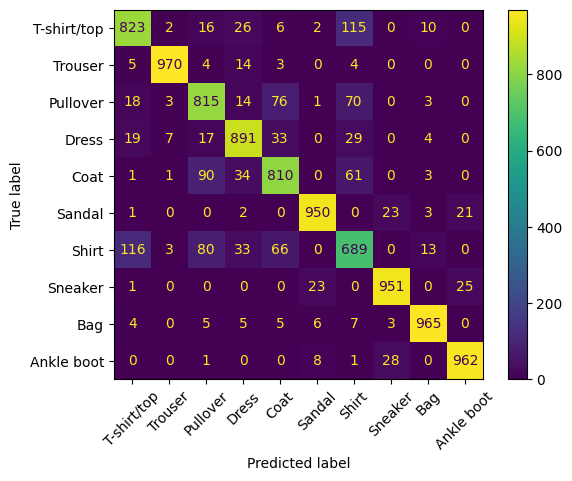

In [9]:
y_pred = model.predict(X_te_scaled)
plot_confusion_matrix(y_pred, y_test)

In [10]:
#function to print classification report
from sklearn.metrics import classification_report

def print_classification(y_true, y_pred):
    print(classification_report(y_true, y_pred, target_names=["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal",
                                                        "Shirt", "Sneaker", "Bag", "Ankle boot"]))

In [11]:
"""print classification"""
print_classification(y_test, y_pred)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.82      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.79      0.81      0.80      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.81      0.81      0.81      1000
      Sandal       0.96      0.95      0.95      1000
       Shirt       0.71      0.69      0.70      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



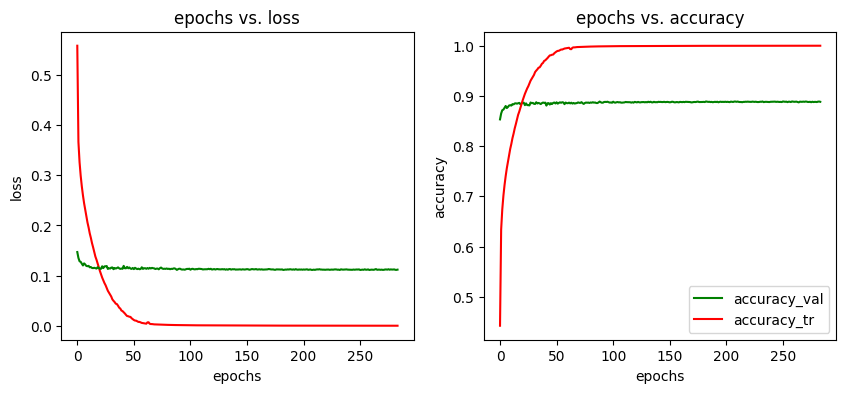

In [24]:
loss_curve = model.loss_curve_
validation_curve = model.validation_scores_
train_accuracy_curve = [1-x for x in loss_curve]
validation_loss_curve = [1-x for x in validation_curve]

figure, axes = plt.subplots(1,2, figsize=(10, 4))
axes[0].plot(loss_curve, color="red", label="loss_curve_tr")
axes[0].plot(validation_loss_curve, color="green", label="loss_curve_val")

axes[0].set_xlabel('epochs')
axes[0].set_ylabel('loss')
axes[0].set_title("epochs vs. loss")


axes[1].plot(validation_curve, color = "green", label="accuracy_val")
axes[1].plot(train_accuracy_curve, color="red", label="accuracy_tr")
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')
axes[1].set_title("epochs vs. accuracy")

plt.legend()
plt.show()